<img title="GitHub Octocat" src='../images/Octocat.jpg?raw=true' style='height: 60px; padding-right: 15px' alt="Octocat" align="left"> This notebook is part of a GitHub repository: https://github.com/pessini/SFI-Grants-and-Awards 
<br>MIT Licensed
<br>Author: Leandro Pessini

# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">SFI - Gender differences in research grant applications</p>

# Gender Equality in STEM Research Programmes in Ireland

<img src='../images/gender_equality.jpeg' style='height:400px; border-radius: 15px'/>

# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">Contents:</p>

* [1. Introduction](#1)
    * [1.1 Audience](#1.1)
    * [1.2 Dataset](#1.2)
    * [1.3 Libraries](#1.3)
* [2. Data Cleaning & Wrangling](#2)
* [3. Exploratory Data Analysis](#3)
    * [3.1 Total applicants by Gender](#3.1)
    * [3.2 Applications submitted each year by Gender](#3.2)
    * [3.3 Total awarded and declined applications by gender](#3.3)
    * [3.4 Number of awarded grants by amount requested](#3.4)
* [4. Dashboard](#4)

<a id="1"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">1- Introduction</p>

<img src='../images/sfi-logo.svg' style='height:100px; padding: 15px' align='right'/> This report will provide an overview of gender equality in awards applied by [Science Foundation Ireland (SFI)](https://www.sfi.ie/) which is the national foundation for investment in scientific and engineering research. The data provided covers a period of time between 2011 and 2018.

The Agreed Programme for Government, published June 2002, provided for establishing SFI as a separate legal entity. In July 2003, SFI was established on a statutory basis under the Industrial Development (Science Foundation Ireland) Act, 2003.

SFI provides awards to support scientists and engineers working in the fields of science and engineering that underpin biotechnology, information and communications technology and sustainable energy and energy-efficient technologies.

The analysis is on __gender differences__ in research grants offered by SFI whether the award was accepted or declined by the applicant.

<a id="1.1"></a>
## Audience

A core principle of data analysis is understanding your audience before designing your visualization. It is important to match your visualization to your viewer’s information needs.

This ad hoc analysis aims to deliver a presentation to the [SFI Executive staff](https://www.sfi.ie/about-us/about-sfi/organisation/management-team/), Director of Science for Society. The director has the responsibility for overseeing all Science Foundation Ireland research funding programs and management of funded awards.

<a id="1.2"></a>
## Dataset

The dataset used is [SFI Gender Dashboard 2019](https://data.gov.ie/dataset/sfi-gender-dashboard-2019) and includes SFI research programmes from 2011 that were managed end-to-end in SFI’s Grants and Awards Management System and reflects a binary categorisation of gender, e.g. male or female between 2011 and 2018. For more information, check out the [Data Dictionary](http://www.sfi.ie/about-us/women-in-science/gender/SFI-Gender-Dashboard-Data-Summary.pdf) available.

Dataset provided by [Ireland's Open Data Portal](https://data.gov.ie/) which helds public data from Irish Public Sectors such as Agriculture, Economy, Housing, Transportation etc.

<a id="1.3"></a>
## Libraries

In [1]:
# Change the default plots size 
options(repr.plot.width=15, repr.plot.height=10)
options(warn=-1)
# Suppress summarise info
options(dplyr.summarise.inform = FALSE)
options(dplyr = FALSE)

In [37]:
# Check if the packages that we need are installed
want = c("dplyr", "ggplot2", "ggthemes", "gghighlight", 
         "grid", "foreign", "scales", "ggpubr", "forcats", 
         "stringr", "lubridate", "Hmisc", "psych")
have = want %in% rownames(installed.packages())
# Install the packages that we miss
if ( any(!have) ) { install.packages( want[!have] ) }
# Load the packages
junk <- lapply(want, library, character.only = T)
# Remove the objects we created
rm(have, want, junk)

In [3]:
sfi.grants.gender <- read.csv('../data/SFIGenderDashboard_TableauPublic_2019.csv')

In [4]:
head(sfi.grants.gender)

,Programme.Name,Year,Award.Status,Applicant.Gender,Amount.Requested,Amount.funded
,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,SFI Investigator Programme / Principal Investigator Programme,2016,Declined,Male,480000,NA
2,SFI Investigator Programme / Principal Investigator Programme,2014,Declined,Female,790000,NA
3,SFI Investigator Project Award,2012,Declined,Female,200000,NA
4,SFI Starting Investigator Research Grant,2018,Declined,Female,400000,NA
5,SFI Investigator Programme / Principal Investigator Programme,2013,Declined,Male,580000,NA
6,SFI Starting Investigator Research Grant,2015,Declined,Female,400000,NA


<a id="2"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">2- Data Cleaning & Wrangling</p>

In [29]:
sfi.grants.gender2 <- sfi.grants.gender

In [30]:
sfi.grants.gender2$Award.Status <- as.factor(sfi.grants.gender2$Award.Status)
sfi.grants.gender2$Applicant.Gender <- as.factor(sfi.grants.gender2$Applicant.Gender)

In [31]:
sapply(sfi.grants.gender2, function(x) sum(is.na(x)))

Programme.Name             Year     Award.Status Applicant.Gender 
               0                0                0                0 
Amount.Requested    Amount.funded 
              59             1973

In [32]:
# There are 59 NA records for Amount Requested
sfi.grants.gender2 %>% filter(is.na(Amount.Requested)) %>% group_by(Applicant.Gender) %>% summarise(n = n())

Applicant.Gender,n
<fct>,<int>
Female,16
Male,43


In [33]:
# Cleaning NA values for Amount Requested because the analysis will use this variable
sfi.grants.gender2 <- sfi.grants.gender2 %>% filter(!is.na(Amount.Requested))
sapply(sfi.grants.gender2, function(x) sum(is.na(x)))

Programme.Name             Year     Award.Status Applicant.Gender 
               0                0                0                0 
Amount.Requested    Amount.funded 
               0             1914

In [34]:
Hmisc::describe(sfi.grants.gender2)

sfi.grants.gender2 

 6  Variables      2719  Observations
--------------------------------------------------------------------------------
Programme.Name 
       n  missing distinct 
    2719        0       12 

lowest : SFI Career Development Award                                  SFI Future Research Leaders programme                         SFI Industry Fellowship                                       SFI Investigator Programme / Principal Investigator Programme SFI Investigator Project Award                               
highest: SFI Research Professorship                                    SFI Science Policy Research Programme                         SFI Spokes Fixed call Programme                               SFI Starting Investigator Research Grant                      SFI Technology Innovation Development Award                  
--------------------------------------------------------------------------------
Year 
       n  missing distinct     Info     Mean      Gmd 
    271

In [35]:
# By Gender
describeBy(sfi.grants.gender[,c("Amount.Requested", "Amount.funded")], sfi.grants.gender$Applicant.Gender)


 Descriptive statistics by group 
group: Female
                 vars   n     mean      sd median  trimmed    mad   min
Amount.Requested    1 719 614617.5 1677506  4e+05 392305.0 444780 10000
Amount.funded       2 213 546244.1 1824061  1e+05 279941.5  74130 10000
                      max    range  skew kurtosis       se
Amount.Requested 29870000 29860000 11.61   163.36  62560.4
Amount.funded    24250000 24240000 10.79   132.59 124982.6
------------------------------------------------------------ 
group: Male
                 vars    n    mean      sd median  trimmed    mad min      max
Amount.Requested    1 2000 1156305 3634810 430000 526062.5 489258   0 47940000
Amount.funded       2  592 1100039 3693443 310000 426940.9 340998   0 44440000
                    range skew kurtosis        se
Amount.Requested 47940000 7.20    58.48  81276.83
Amount.funded    44440000 7.04    56.67 151799.59

---
As expected the number of Male Applicants is way higher than Female ones.
- Male Applicants = __2.000__
- Female Applicants = __719__

In [174]:
# Creating a category based on quantile to categorize the Amount Requested
sfi.grants.gender2 <- sfi.grants.gender2 %>%
  mutate(Category.Amount= cut(Amount.Requested, 
                             breaks=quantile(Amount.Requested, c(0,.25,.50,.75,1), na.rm = TRUE), 
                             labels=c("low","medium","high","very-high")))

# handling amount requested = 0
sfi.grants.gender2$Category.Amount[sfi.grants.gender2$Amount.Requested == 0] <- "low"

sfi.grants.gender2 %>% group_by(Category.Amount) %>% summarise(total= n()) %>% ungroup()

Category.Amount,total
<fct>,<int>
low,802
medium,625
high,618
very-high,674


In [36]:
paste0("Number of rows in the dataset: ", nrow(sfi.grants.gender2))

[1] "Number of rows in the dataset: 2719"

<a id="3"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">3- Exploratory Data Analysis</p>

In [52]:
# Filtering the total amount requested and number of request for all applicants
total_requested <- sfi.grants.gender2 %>% 
summarise(Total.Amount.Requested = sum(Amount.Requested),
         Total.Requests = n())
total_requested

Total.Amount.Requested,Total.Requests
<dbl>,<int>
2754520000,2719


In [66]:
# Filtering the total amount requested and number of request by Gender
requests_by_gender <- sfi.grants.gender2 %>% 
                        group_by(Applicant.Gender) %>%
                        summarise(total.amount = round(sum(Amount.Requested),2), 
                                  proportion.applicants = round(n()/total_requested$Total.Requests,2)) %>%
                        mutate(label = paste0(round(proportion.applicants * 100, 2), "%"), 
                               label_y = cumsum(proportion.applicants) - 0.5 * proportion.applicants)
requests_by_gender

Applicant.Gender,total.amount,proportion.applicants,label,label_y
<fct>,<dbl>,<dbl>,<chr>,<dbl>
Female,441910000,0.26,26%,0.13
Male,2312610000,0.74,74%,0.63


<a id="3.1"></a>
## Total applicants by Gender

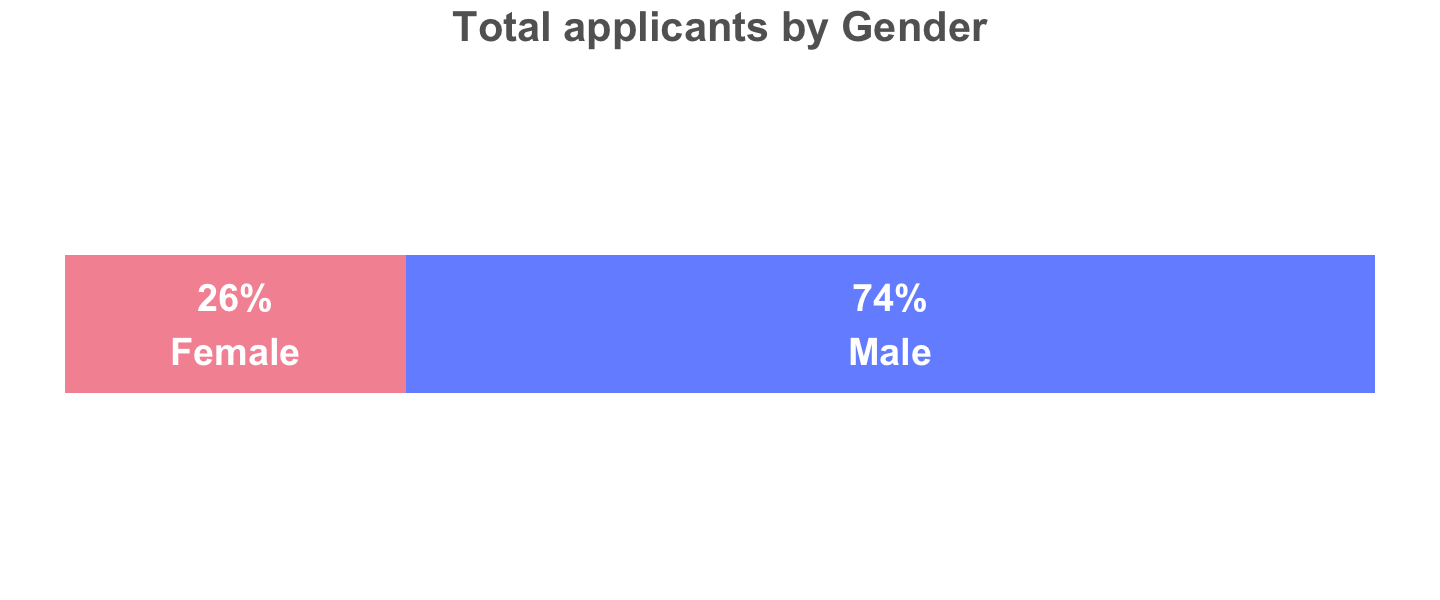

In [72]:
options(repr.plot.width=12, repr.plot.height=5)
requests_by_gender %>% 
    ggplot(aes(x = "", y = proportion.applicants)) +
        geom_bar(aes(fill = fct_reorder(Applicant.Gender, proportion.applicants, .desc = FALSE)), lineend = 'round',
                 stat = "identity", width = .3, alpha=.9, position = position_stack(reverse = TRUE)) +
        coord_flip() +
        scale_fill_manual(values = c("#F48898", "#6487FF")) +
        geom_text(aes(y = label_y, label = paste0(label, "\n", Applicant.Gender)), 
                  size = 8, col = "white", fontface = "bold") +
        labs(x = "", y = "%",
            title = "Total applicants by Gender") + 
        theme_void() +
        theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
        theme(legend.position = "none",
              plot.title=element_text(vjust=.8, hjust = .5, family='', face='bold', colour='#636363', size=25))

#F48898 - Pink
#6487FF - Blue

As expected the number of __Male__ applicants is way higher than the __Female__ applicants.

In [75]:
# changing the global plot size back
options(repr.plot.width=15, repr.plot.height=10)

<a id="3.2"></a>
## How many applications were submitted each year by Gender?

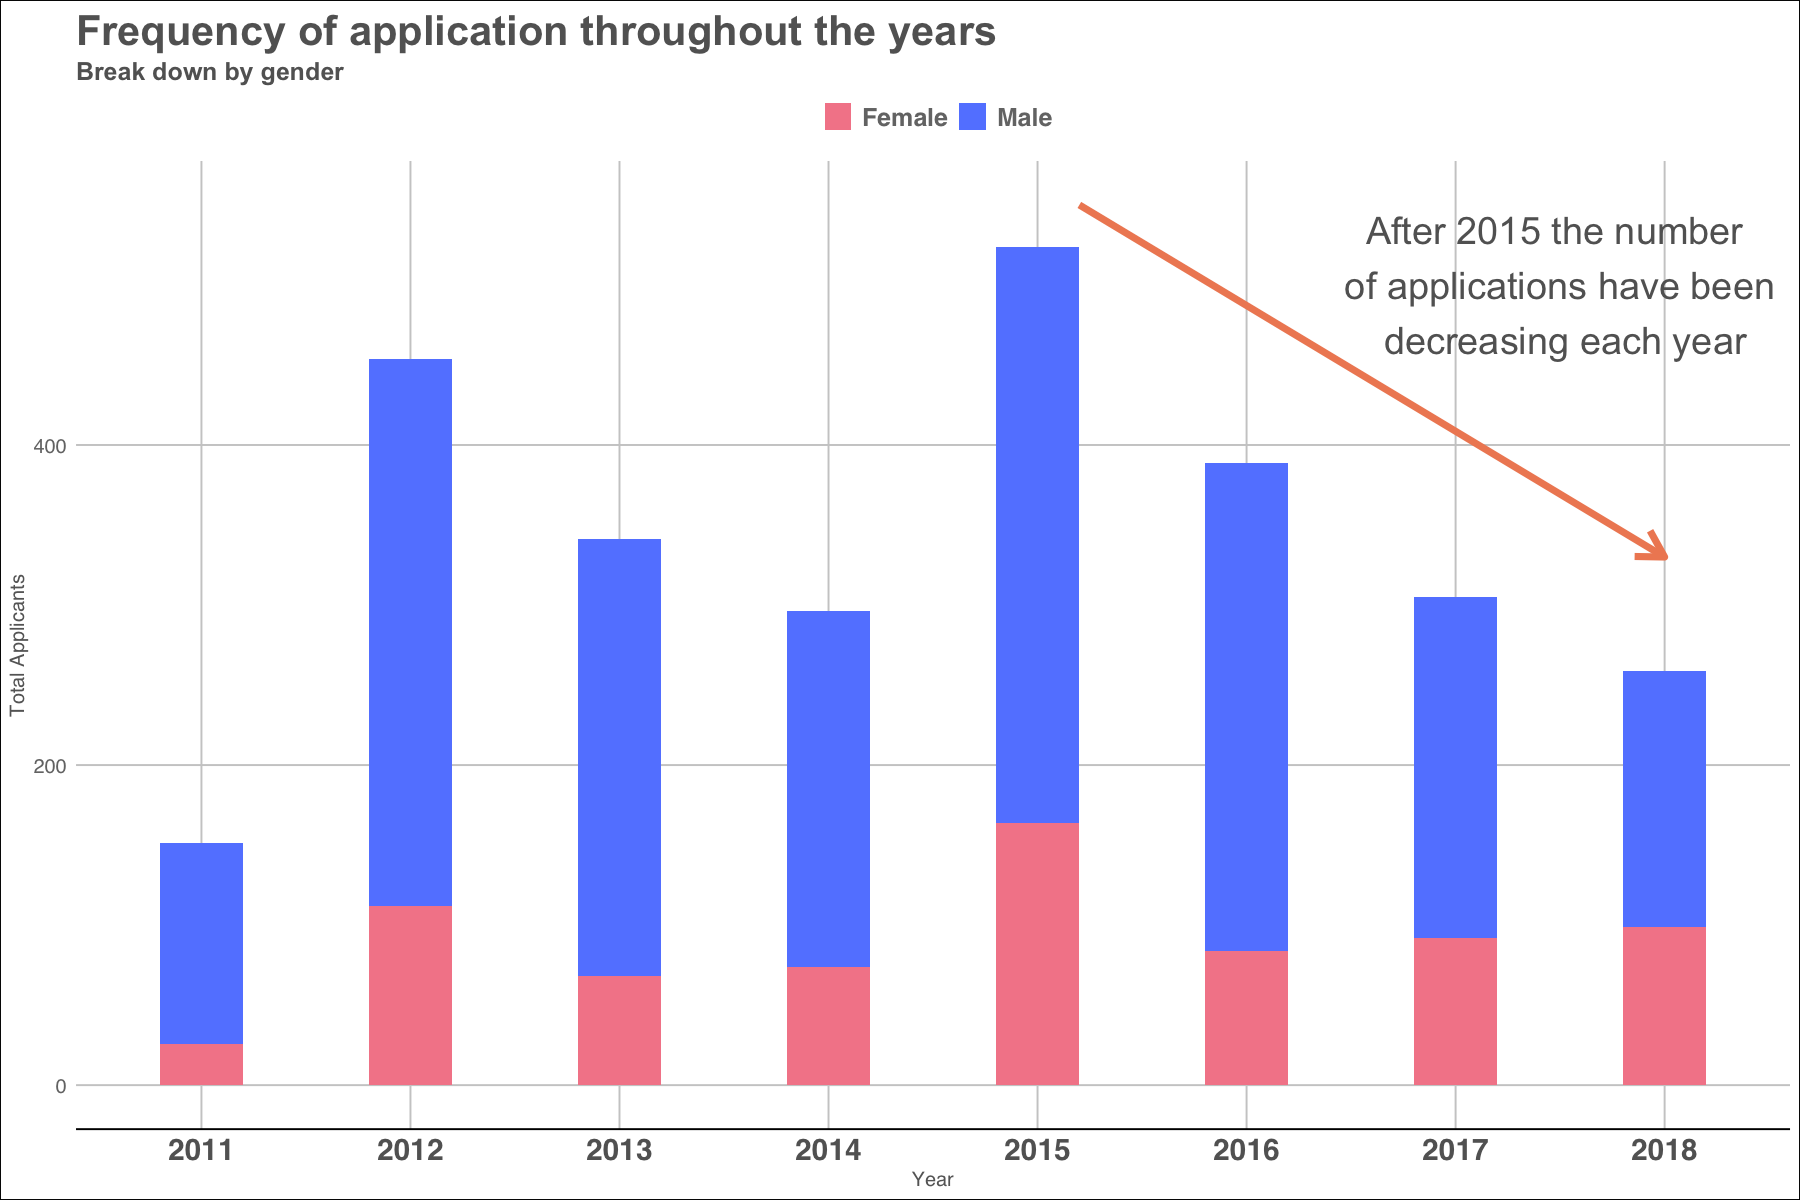

In [147]:
# Filtering the total applicantions by year
total.by.year <- sfi.grants.gender2 %>% 
                    group_by(Year) %>% 
                    summarise(Total.Requests = n())


# by gender
sfi.grants.gender2 %>% 
    group_by(Year, Applicant.Gender) %>% 
    summarise(total = n()) %>%
    ggplot(aes(x= factor(Year), y=total)) + 
    geom_bar(aes(fill=Applicant.Gender), position = position_stack(reverse = TRUE),
             stat="identity", width = .4) +
    scale_fill_manual(values = c("#F48898", "#6487FF")) +
    annotate("segment", x = 5.2, xend = 8, y = 550, yend = 330,
           colour = "#ef8a62", size = 2, arrow = arrow()) +
    annotate("text", x = 7.5, y = 500, family='', face='bold', colour='#636363', size=8,
               label = "After 2015 the number \n of applications have been \n decreasing each year") +
    labs(x = "Year", y = "Total Applicants", fill = "",
        title = "Frequency of application throughout the years",
        subtitle = "Break down by gender")+ 
    theme_gdocs() + 
    theme(legend.position = "top", 
          legend.direction = "horizontal",
          legend.text = element_text(size=15, face="bold"),
          axis.text.x = element_text(face="bold", color="#636363", size=18),
          plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=25),
          plot.subtitle=element_text(vjust=.5,family='', face='bold', colour='#636363', size=15))

After reached a peak in number of grants in 2015 we can see a decreasing in the coming years. In 2015, SFI made a [report](https://www.sfi.ie/research-news/publications/annual-reports/Annual-report-2015.pdf) stating that the number of PhD graduates in STEM research has reduced which may lead to a skills deficit in future years.

__The chart shows that the prediction has happened and caused an impact on the number of applications.__

<a id="3.3"></a>
## Total awarded and declined applications by gender

In [144]:
total_awarded_declined <- sfi.grants.gender2 %>% 
    group_by(Award.Status) %>%
    summarise(total = n())

Award.Status,total
<fct>,<int>
Awarded,804
Declined,1915


In [159]:
sfi.grants.gender2 %>%
    group_by(Award.Status, Applicant.Gender) %>%
    summarise(total = n()) %>% 
    left_join(total_awarded_declined, by = c("Award.Status")) %>%
    mutate(proportion = total/total.awards.status,
           label = paste0(round(proportion * 100, 1), "%"), 
           label_y = cumsum(proportion) - 0.5 * proportion)

Award.Status,Applicant.Gender,total,total.awards.status,proportion,label,label_y
<fct>,<fct>,<int>,<int>,<dbl>,<chr>,<dbl>
Awarded,Female,214,804,0.2661692,26.6%,0.1330846
Awarded,Male,590,804,0.7338308,73.4%,0.6330846
Declined,Female,505,1915,0.2637076,26.4%,0.1318538
Declined,Male,1410,1915,0.7362924,73.6%,0.6318538


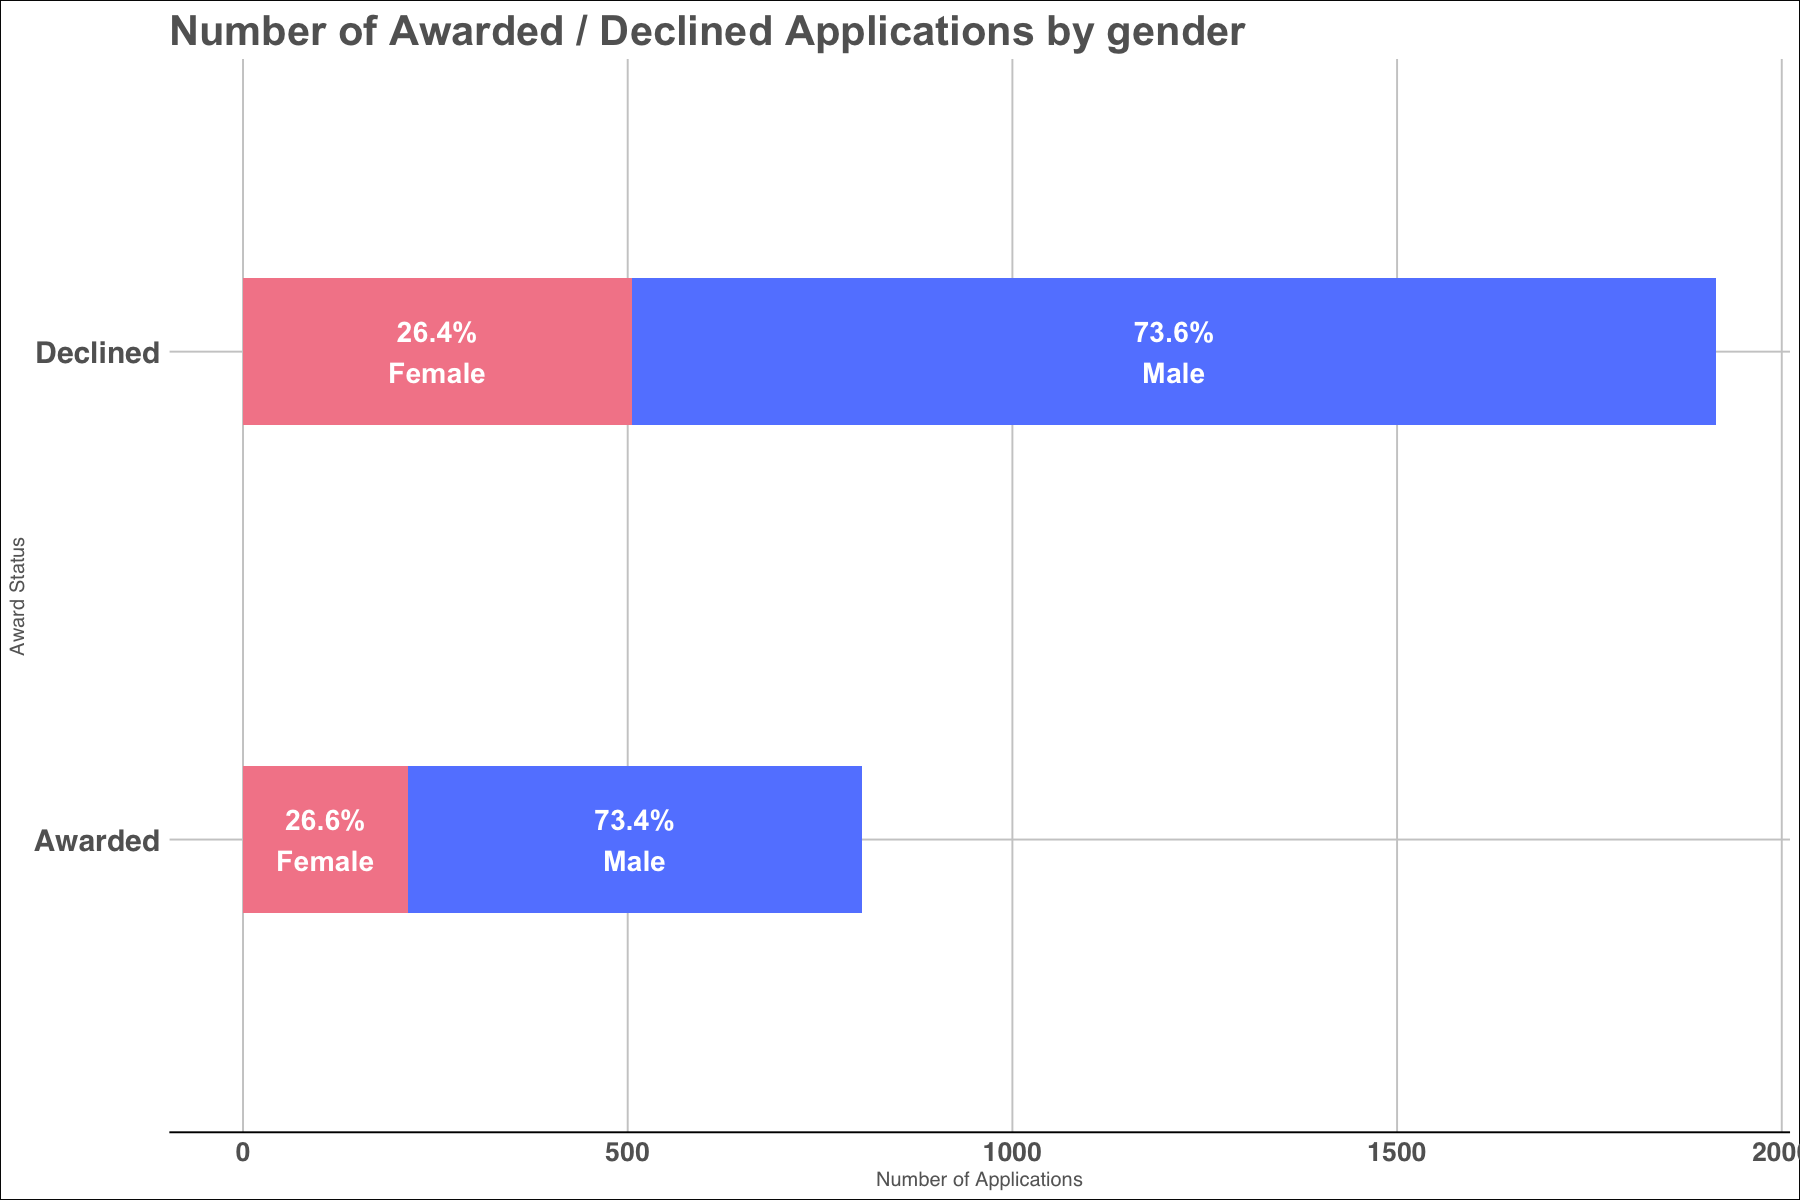

In [162]:
total_awarded_declined <- sfi.grants.gender2 %>% 
    group_by(Award.Status) %>%
    summarise(total.awards.status = n())

# Proportion of accepted and denied applications by gender
sfi.grants.gender2 %>%
    group_by(Award.Status, Applicant.Gender) %>%
    summarise(total = n()) %>% 
    left_join(total_awarded_declined, by = c("Award.Status")) %>%
    mutate(proportion = total/total.awards.status,
           label = paste0(round(proportion * 100, 1), "%"), 
           label_y = cumsum(total) - 0.5 * total) %>%
    ggplot(aes(x= Award.Status, y=total)) + 
    geom_bar(aes(fill=Applicant.Gender), position = position_stack(reverse = TRUE),
             stat="identity", width = .3) +
    geom_text(aes(y=label_y, label = paste0(label, "\n", Applicant.Gender)), 
              col = "white",
              size = 6,
              fontface = "bold") +
    scale_fill_manual(values = c("#F48898", "#6487FF")) +
    labs(x = "Award Status", y = "Number of Applications", fill = "",
        title = "Number of Awarded / Declined Applications by gender")+ 
    coord_flip() +
    theme_gdocs() + 
    theme(legend.position = "none",
          axis.text.x = element_text(face="bold", color="#636363", size=16),
          axis.text.y = element_text(face="bold", color="#636363", size=18),
          plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=25))

The proportion of Awarded/Declined Grants is practically the same to both genders.

__26.5% Awarded | 73.5% Declined__

In [12]:
# By Award Status
describeBy(sfi.grants.gender[,c("Amount.Requested", "Amount.funded")], sfi.grants.gender$Award.Status)


 Descriptive statistics by group 
group: Awarded
                 vars   n      mean      sd median  trimmed    mad   min
Amount.Requested    1 804 1024701.5 3616477 265000 405993.8 289107 10000
Amount.funded       2 801  954360.8 3319078 240000 383666.2 266868  3000
                      max    range skew kurtosis       se
Amount.Requested 47940000 47930000 7.78    68.92 127543.3
Amount.funded    44440000 44437000 7.73    68.96 117273.9
------------------------------------------------------------ 
group: Declined
                 vars    n    mean      sd median  trimmed    mad min      max
Amount.Requested    1 1915 1008178 3073772 440000 521161.1 504084   0 45380000
Amount.funded       2    4  782500  895484 655000 782500.0 919212   0  1820000
                    range skew kurtosis        se
Amount.Requested 45380000 7.98    72.19  70240.45
Amount.funded     1820000 0.13    -2.29 447742.02

---
Analysing the descriptive statistics separated by Award status we can see that the average difference between Requested and Funded is not high.

- __Mean Amount Requested => €1.024.701,50__
- __Mean Amount Awarded => €954.360,80__

<a id="3.4"></a>
## Number of awarded grants by amount requested

In [14]:
CrossTable(total.amount.requested$Award.Status, total.amount.requested$Category.Amount,
          prop.r=TRUE,
          prop.c=FALSE,
          prop.t=FALSE,
          prop.chisq=FALSE,
          digits=2)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  2716 

 
                                    | total.amount.requested$Category.Amount 
total.amount.requested$Award.Status |       low |    medium |      high | very-high | Row Total | 
------------------------------------|-----------|-----------|-----------|-----------|-----------|
                            Awarded |       364 |       133 |       121 |       186 |       804 | 
                                    |      0.45 |      0.17 |      0.15 |      0.23 |      0.30 | 
------------------------------------|-----------|-----------|-----------|-----------|-----------|
                           Declined |       435 |       492 |       497 |       488 |      1912 | 
                                    |      0.23 |      0.26 |      0.26 |      0.26 |      0.70 | 
------------------------------------|-----------|--------

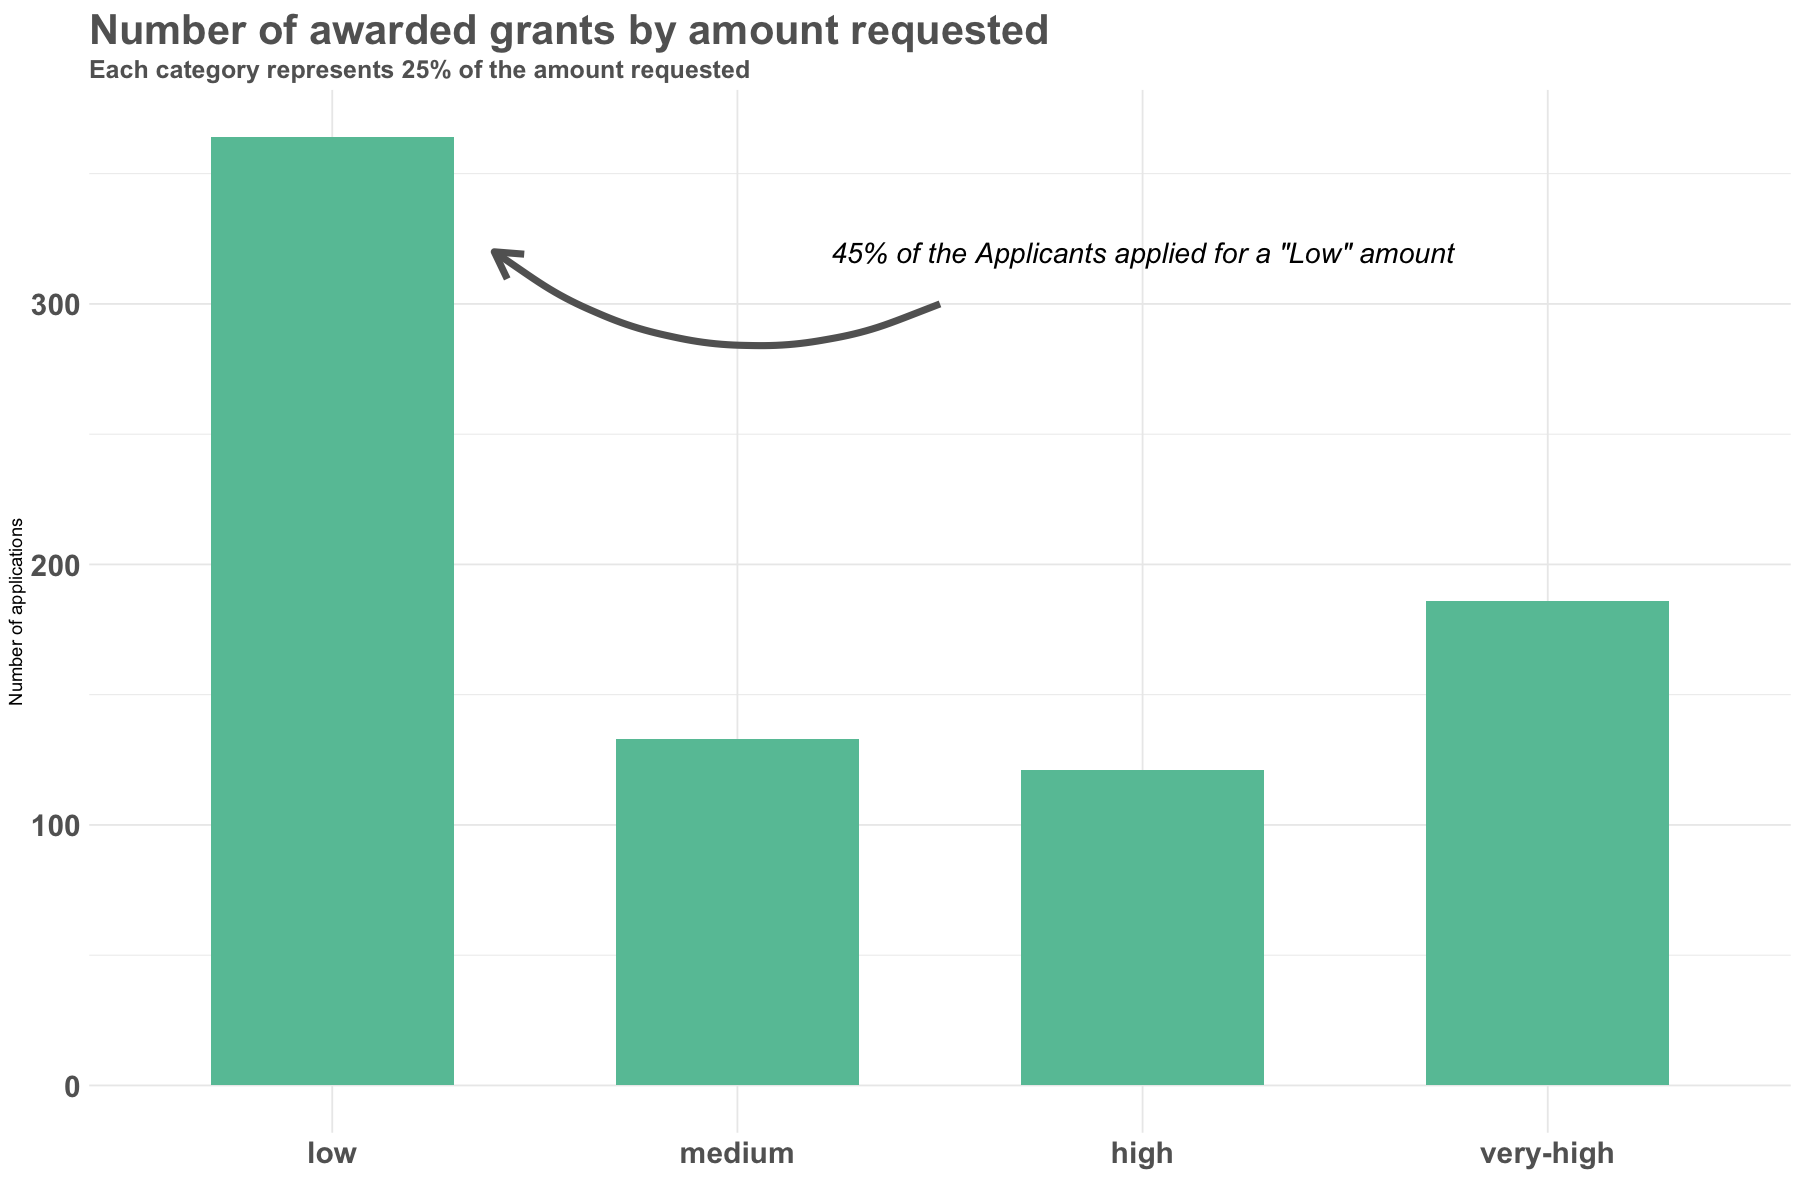

In [217]:
# Plot the total awarded grants by categories
categories.amount <- total.amount.requested %>%
  group_by(Category.Amount, Award.Status) %>%
  filter(!is.na(Category.Amount), Award.Status == "Awarded") %>%
  summarise(total = n())

categories.amount %>% 
    ggplot(aes(x= Category.Amount, y=total, fill="")) + 
    geom_bar(position="dodge",stat="identity", width = .6) +
    scale_fill_brewer(palette = "Set2") +
    scale_y_continuous(labels = scales::number) +
    annotate("curve", curvature = -.3, x = 2.5, xend = 1.4, y = 300, yend = 320,
               colour = "#636363", size = 2, arrow = arrow()) +
    annotate("text", x = 3, y = 320, family = "", fontface = 3, size=6,
               label = "45% of the Applicants applied for a \"Low\" amount") +
    labs(x = "", y = "Number of applications", 
         title = "Number of awarded grants by amount requested",
         subtitle = "Each category represents 25% of the amount requested") + 
    theme_minimal() + 
    theme(legend.position = "none",
          axis.text.x = element_text(face="bold", color="#636363", size=18), 
          axis.text.y = element_text(face="bold", color="#636363", size=18),
          plot.title=element_text(vjust=.5,family='', face='bold', colour='#636363', size=25),
          plot.subtitle=element_text(vjust=.5,family='', face='bold', colour='#636363', size=15))

__45%__ of the Applicants who have their grant application Awarded __applied for a "Low" amount__.

<a id="4"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">4- Dashboard</p>

<img src='../images/tableau-logo.png' style='height:50px; padding-right:15px' align='left'/> 
<br>
This Dashboard was created using Tableau® software.
<br><br>

The __focus__ is to show the main insights found on this analysis. The Dashboard along with the Data Exploration can be found on [Tableau website](https://public.tableau.com/profile/leandro.pessini#!/vizhome/ScienceFoundationIrelandSFI-Gender/Awards-Gender).

![SFI - Gender Dashboard](../images/gender-dashboard.png)

<img title="GitHub Mark" src="../images/GitHub-Mark-64px.png?raw=true" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/SFI-Grants-and-Awards) <br>Author: Leandro Pessini

In [16]:
R.version$version.string

[1] "R version 4.0.2 (2020-06-22)"